<a href="https://colab.research.google.com/github/jy7lsna/PyTorch-Notes/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import torch
from torch import nn
import matplotlib.pyplot as plt

1. Data(preparing and loading)
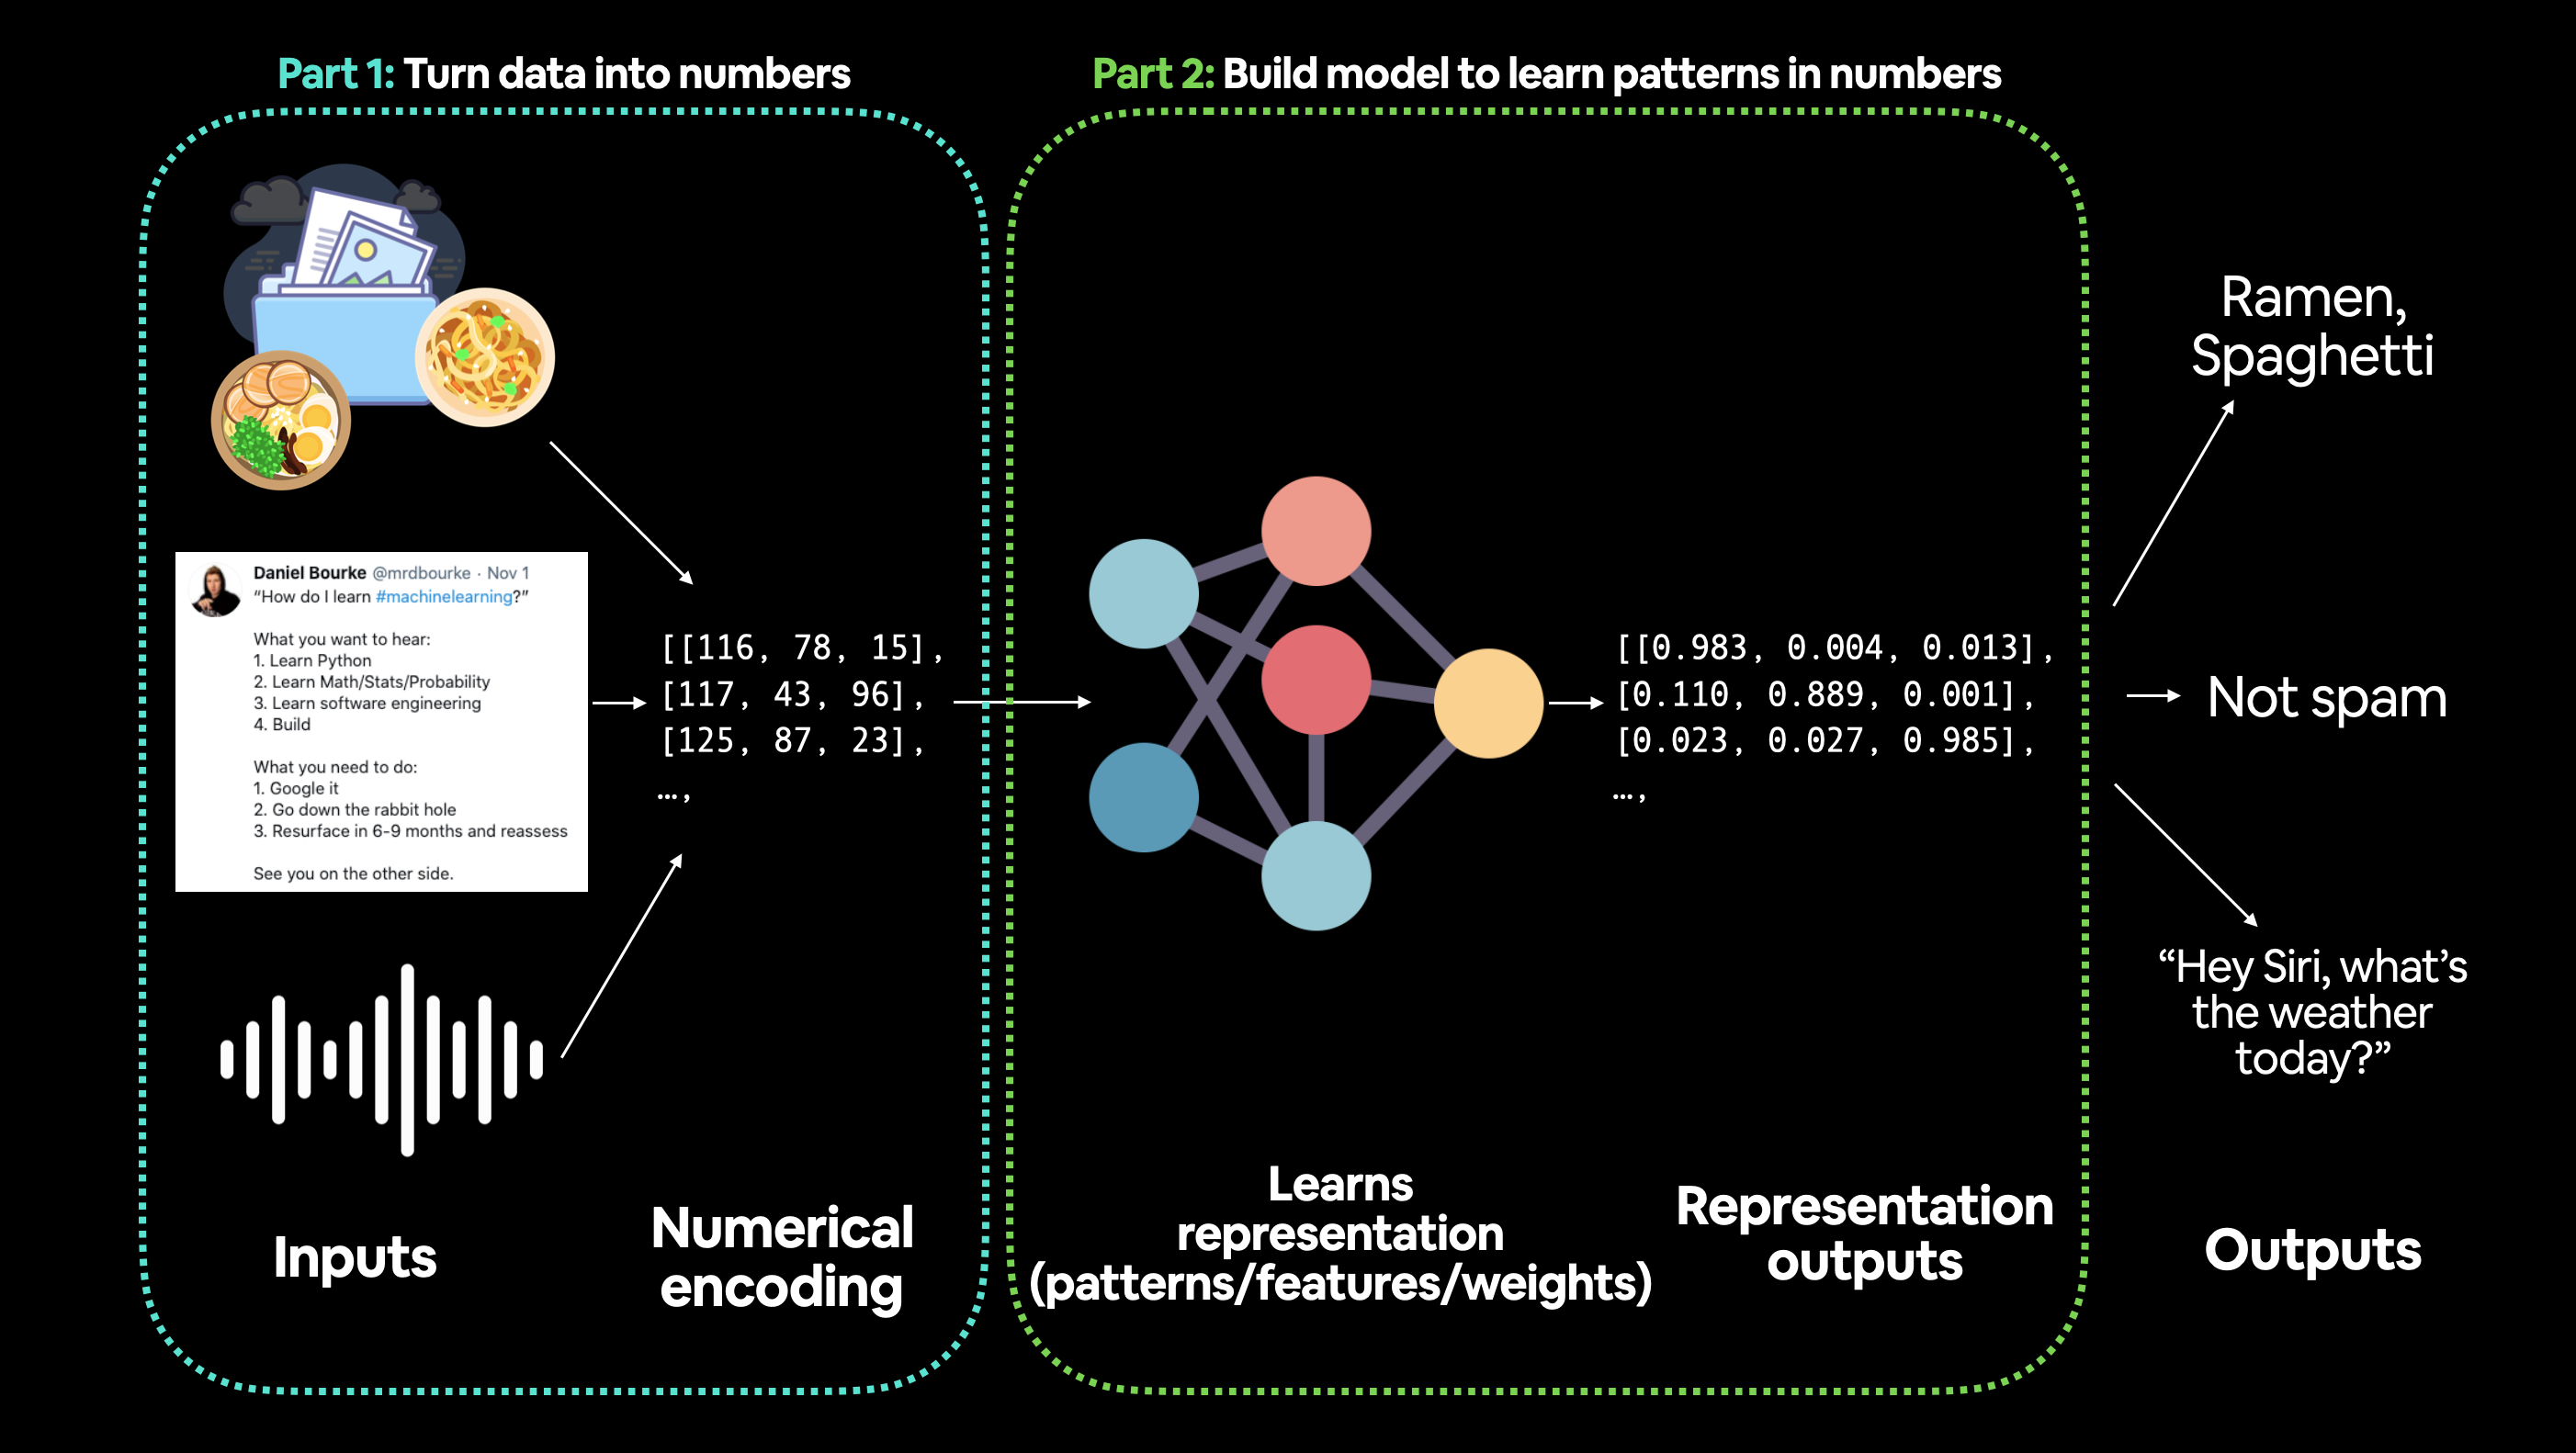

In [77]:
# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [78]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len, len(x_test), len(y_test)

(40, 40, <function len(obj, /)>, 10, 10)

In [79]:
def plot_predictions(train_data = x_train,
                    train_labels = y_train,
                    test_data = x_test,
                    test_labels = y_test,
                    predictions = None):
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot tezst data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

  if predictions is not None:
    # plot predictions in red (predictions are made on the etst data)
    plt.scatter(test_data, predictions, c="r", s=4, label = "Preductions")

  # show the legend
  plt.legend(prop={"size": 14});

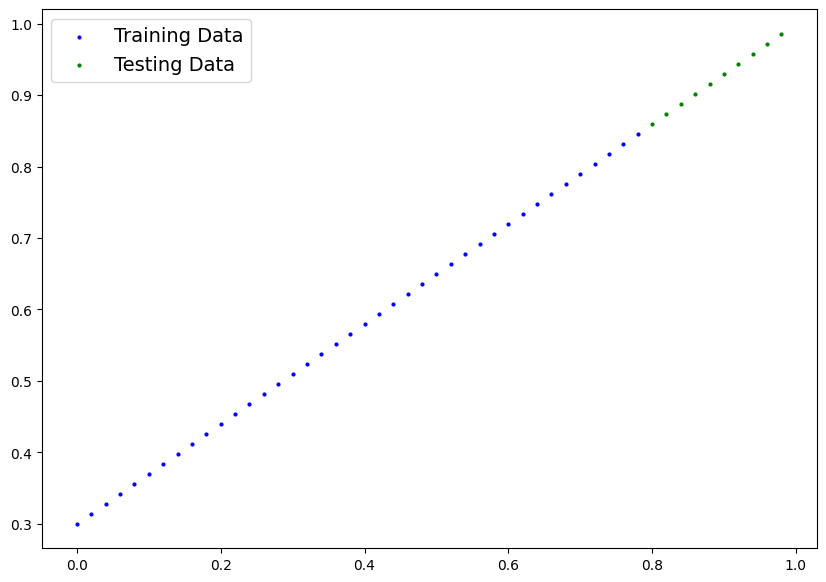

In [80]:
plot_predictions();

In [81]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                            requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float),
                                         requires_grad=True)


  def forward(self, x: torch.Tensor) -> torch.tensor:
    return self.weights * x + self.bias

In [82]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [83]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [84]:
weight, bias

(0.7, 0.3)

**Make predictions**

In [85]:
# Make predictions with mdoel
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [86]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

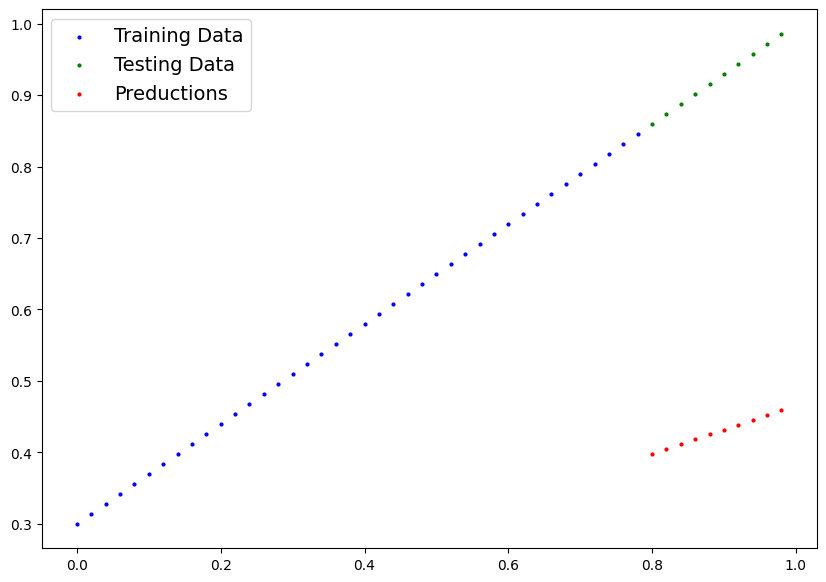

In [87]:
plot_predictions(predictions=y_preds)

**Train Model**

In [88]:
# create loss function
loss_fn = nn.L1Loss() #MAE same as L1Loss

# create the optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  #learning rate

**Building a training**

In [89]:
torch.manual_seed(42)

# an epoch is one loop through the data
epochs = 200

# create empty loss lists to track values
loss_values = []
test_loss_values = []
epoch_count = []

# traning
# 0. loop thru the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(x_train)

  #2.Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation loss backwards
  loss.backward()

  # 5. steo the optimizer(perform gradient descent)
  optimizer.step()

  # testing

  # put model in eval mode
  model_0.eval()

  with torch.inference_mode():
    # 1. forward pass on test data
    test_pred = model_0(x_test)

    # 2. Calculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    # print whats happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

      print(model_0.state_dict())

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE 

In [98]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

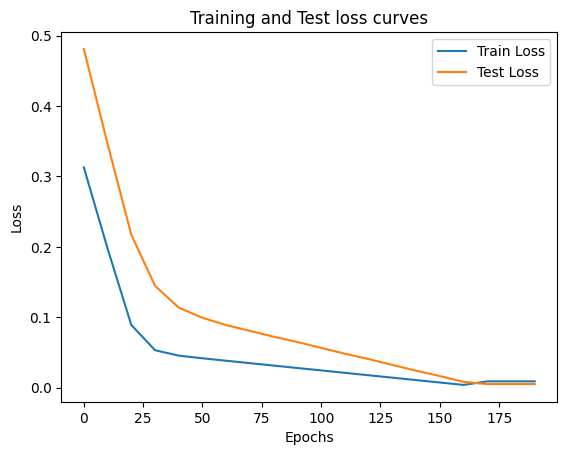

In [103]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [90]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

In [91]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [92]:
weight, bias

(0.7, 0.3)

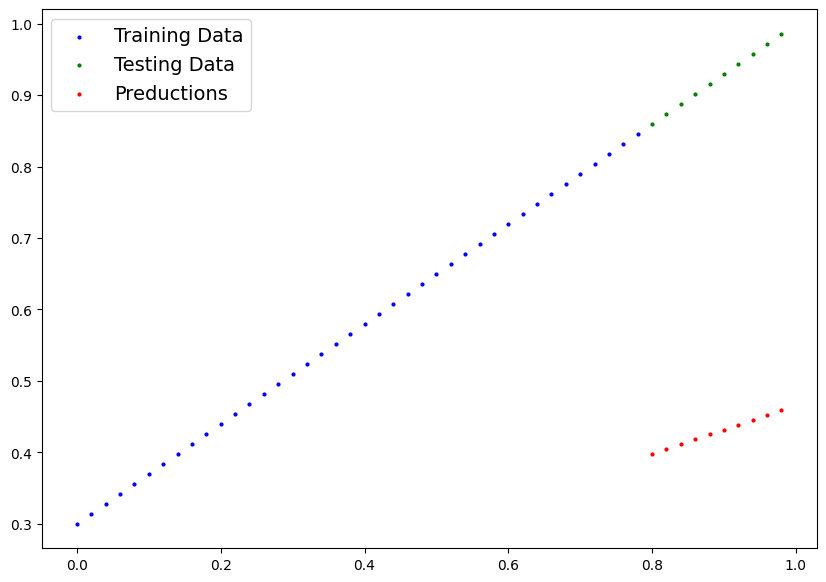

In [93]:
plot_predictions(predictions=y_preds)

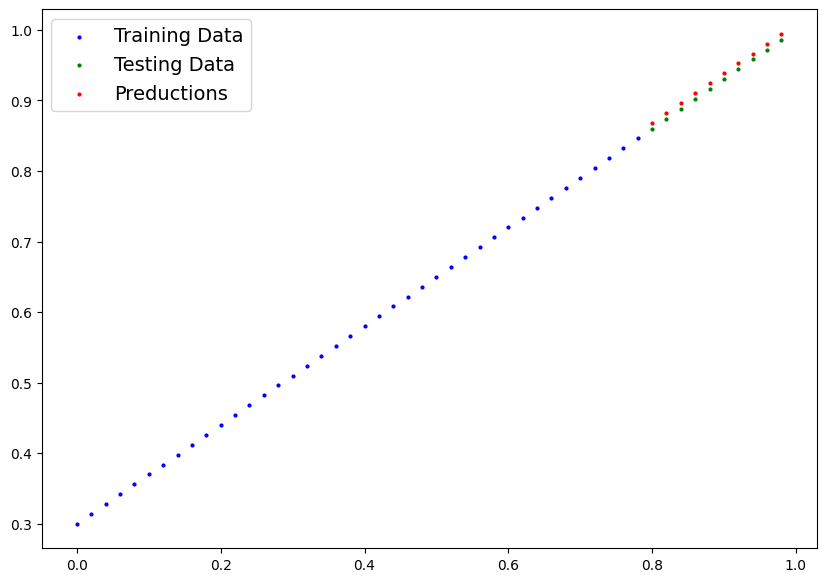

In [94]:
plot_predictions(predictions=y_preds_new)

**Saving a PyTorch model**

In [106]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_PyTorch_Workflow_Fundamentals.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH


#save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_Workflow_Fundamentals.pth
